In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import fftpack
import datetime
from sklearn import mixture

In [3]:
x = np.arange(0, 250)
y = np.empty([250], dtype = int)
count = 0
for i in range (0, 250):
    count = count + 1
    if(count%2 == 1):
        y[i] = 100
    else:
        y[i] = 400
time = np.arange(0, 250, 1)
add = np.sin(time)
plot.plot(time, add)
plt.show()
sd = y
plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.title("Synthetic Data")
plt.show()

NameError: name 'plot' is not defined

In [3]:
pd.DataFrame(sd).describe()

,0
count,250.000000
mean,250.000000
std,150.300903
min,100.000000
25%,100.000000
50%,250.000000
75%,400.000000
max,400.000000


In [4]:
seasonal_data = pd.DataFrame(zip(x,y),columns=['Time','Value'])
seasonal_data

,Time,Value
0,0,100
1,1,400
2,2,100
3,3,400
4,4,100
...,...,...
245,245,400
246,246,100
247,247,400
248,248,100


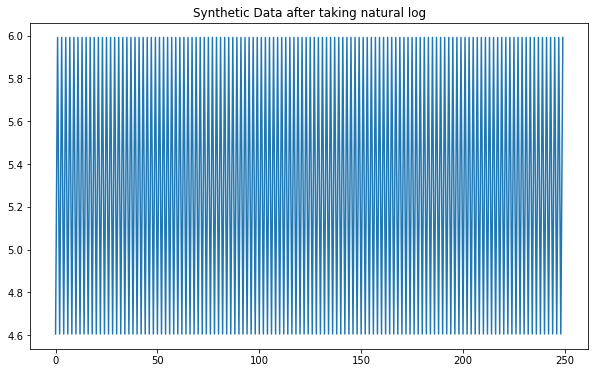

In [5]:
log_data = np.log(seasonal_data['Value'])
plt.figure(figsize=(10,6))
plt.plot(seasonal_data['Time'], log_data)
plt.title("Synthetic Data after taking natural log")
plt.show()

In [6]:
nlog_data = pd.DataFrame(zip(seasonal_data['Time'], log_data),columns=['Time','Log Value'])
nlog_data

,Time,Log Value
0,0,4.605170
1,1,5.991465
2,2,4.605170
3,3,5.991465
4,4,4.605170
...,...,...
245,245,5.991465
246,246,4.605170
247,247,5.991465
248,248,4.605170


In [7]:
N = 250
sr = 1
y = np.array(seasonal_data['Value'])
f = fftpack.fftfreq(len(y))
yf = fftpack.fft(y)

T = 1.0 / N
x = np.linspace(0.0, N*T, N)
xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
freq_ampli = pd.DataFrame(zip(np.abs(f[:N//2+1]),2.0/N * np.abs(yf[:N//2+1])),columns=['Freq','Ampli'])
freq_ampli

,Freq,Ampli
0,0.000,5.000000e+02
1,0.004,0.000000e+00
2,0.008,5.378755e-15
3,0.012,3.586819e-15
4,0.016,0.000000e+00
...,...,...
121,0.484,0.000000e+00
122,0.488,2.155787e-15
123,0.492,3.229717e-15
124,0.496,0.000000e+00


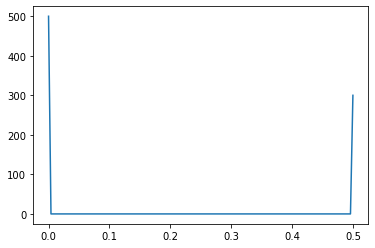

In [8]:
plt.plot(freq_ampli['Freq'], freq_ampli['Ampli'])
plt.show()

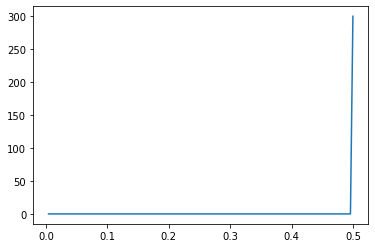

In [9]:
plt.plot(freq_ampli['Freq'][1:], freq_ampli['Ampli'][1:])
plt.show()

In [10]:
frame_size = 50
Fs = 1
dt = 1/Fs
freq_vector = np.fft.rfftfreq(frame_size, d=dt)
yf1 = yf[yf != 0]
yf1

array([ 6.25000000e+04-0.00000000e+00j,  2.14182271e-13-6.37316993e-13j,
       -1.32105846e-13-4.28448243e-13j,  6.58986846e-14-1.80947040e-13j,
       -4.56440695e-14-1.62346258e-13j,  4.12601241e-14-1.05117348e-13j,
       -2.57615778e-14-1.01154241e-13j,  3.11712440e-14-7.40669677e-14j,
       -1.69790043e-14-7.41242588e-14j,  2.57157517e-14-5.72766887e-14j,
       -1.20613470e-14-5.89892660e-14j,  2.23241292e-14-4.68383482e-14j,
       -8.94283034e-15-4.93914585e-14j,  2.00341908e-14-3.97906423e-14j,
       -6.81105920e-15-4.28305416e-14j,  1.84053264e-14-3.47775133e-14j,
       -5.28271848e-15-3.81267925e-14j,  1.72083896e-14-3.10937205e-14j,
       -4.15447354e-15-3.46544116e-14j,  1.63136596e-14-2.83400247e-14j,
       -3.30969619e-15-3.20544543e-14j,  1.56436149e-14-2.62778392e-14j,
       -2.67817201e-15-3.01108227e-14j,  1.51508018e-14-2.47611166e-14j,
       -2.21690450e-15-2.86911873e-14j,  1.48067527e-14-2.37022422e-14j,
       -1.90042808e-15-2.77171730e-14j,  1.45963719

In [11]:
quefrency = np.fft.rfftfreq(np.log(yf1).size,freq_vector[1] - freq_vector[0])
cepstrum = np.fft.rfft(np.log(np.abs(yf1)))

In [12]:
quefrency[1:]

array([ 0.49019608,  0.98039216,  1.47058824,  1.96078431,  2.45098039,
        2.94117647,  3.43137255,  3.92156863,  4.41176471,  4.90196078,
        5.39215686,  5.88235294,  6.37254902,  6.8627451 ,  7.35294118,
        7.84313725,  8.33333333,  8.82352941,  9.31372549,  9.80392157,
       10.29411765, 10.78431373, 11.2745098 , 11.76470588, 12.25490196,
       12.74509804, 13.23529412, 13.7254902 , 14.21568627, 14.70588235,
       15.19607843, 15.68627451, 16.17647059, 16.66666667, 17.15686275,
       17.64705882, 18.1372549 , 18.62745098, 19.11764706, 19.60784314,
       20.09803922, 20.58823529, 21.07843137, 21.56862745, 22.05882353,
       22.54901961, 23.03921569, 23.52941176, 24.01960784, 24.50980392,
       25.        ])

In [13]:
cepstrum[1:]

array([ 1.28840864e+01-1.01585407e-14j,  1.28468590e+02+3.55271368e-15j,
        2.02914474e-01-3.13638004e-14j,  1.02922272e+02-8.21565038e-15j,
       -1.77169752e-02-2.29816166e-14j,  9.35127811e+01-2.53130850e-14j,
       -1.31030090e-02-1.24344979e-14j,  8.85806253e+01-1.93178806e-14j,
       -7.87728890e-03-1.60047172e-14j,  8.55004783e+01-1.64222618e-14j,
       -5.16780813e-03-1.89290164e-14j,  8.33741712e+01-2.99021848e-14j,
       -3.64806666e-03+5.71736243e-15j,  8.18123571e+01+1.80122623e-14j,
       -2.72011569e-03-4.51945794e-15j,  8.06186645e+01+1.69540989e-14j,
       -2.12029183e-03+1.23324685e-13j,  7.96832284e+01+3.57591144e-15j,
       -1.71969561e-03-7.18399319e-15j,  7.89397986e+01+2.98361375e-14j,
       -1.44991848e-03-2.05419874e-15j,  7.83461211e+01+3.21592823e-14j,
       -1.27285198e-03-4.27407250e-15j,  7.78740791e+01-2.21140709e-15j,
       -1.16722679e-03-4.45839772e-15j,  7.75043709e+01-3.97929726e-15j,
       -1.12234143e-03-4.89402027e-15j,  7.72234816

In [14]:
cep = pd.DataFrame(zip(quefrency,cepstrum.real),columns=['Quefrency','Cepstrum'])
cep

,Quefrency,Cepstrum
0,0.000000,-3035.862617
1,0.490196,12.884086
2,0.980392,128.468590
3,1.470588,0.202914
4,1.960784,102.922272
5,2.450980,-0.017717
6,2.941176,93.512781
7,3.431373,-0.013103
8,3.921569,88.580625
9,4.411765,-0.007877


In [15]:
# GMM on normal time series data
dfx = np.array(seasonal_data['Value']).reshape(-1,1)
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm0 = gmm

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  label =

In [16]:
# GMM on natural log values of time series data 
dfx = np.array(nlog_data['Log Value']).reshape(-1,1)
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm1 = gmm

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  label =

In [18]:
dfx = freq_ampli
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm2 = gmm

In [19]:
# GMM on cepstrum data 
dfx = cep.iloc[1:,:]
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm3 = gmm

Results of GMM on normal time series data

In [20]:
seasonal_data.describe()

,Time,Value
count,250.000000,250.000000
mean,124.500000,250.000000
std,72.312977,150.300903
min,0.000000,100.000000
25%,62.250000,100.000000
50%,124.500000,250.000000
75%,186.750000,400.000000
max,249.000000,400.000000


In [21]:
best_gmm0

GaussianMixture(covariance_type='tied', n_components=2)

In [22]:
best_gmm0.weights_

array([0.5, 0.5])

In [23]:
best_gmm0.means_

array([[100.],
       [400.]])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Value'>

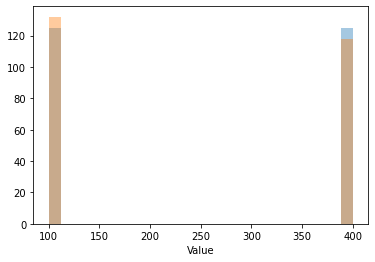

In [24]:
#Time Series
sns.distplot(seasonal_data['Value'],kde=False, bins = 25)
z,_ = best_gmm0.sample(250)
sns.distplot(z,kde=False, bins = 25)

In [25]:
#Time Series
print(best_gmm0.score(np.array(seasonal_data['Value']).reshape(-1,1)))
#print(best_gmm0.score(z))

5.29566956521752


Results of GMM on natural log values of time series data

In [26]:
nlog_data.describe()

,Time,Log Value
count,250.000000,250.000000
mean,124.500000,5.298317
std,72.312977,0.694538
min,0.000000,4.605170
25%,62.250000,4.605170
50%,124.500000,5.298317
75%,186.750000,5.991465
max,249.000000,5.991465


In [27]:
best_gmm1

GaussianMixture(covariance_type='tied', n_components=2)

In [28]:
best_gmm1.weights_

array([0.5, 0.5])

In [29]:
best_gmm1.means_

array([[5.99146455],
       [4.60517019]])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Log Value'>

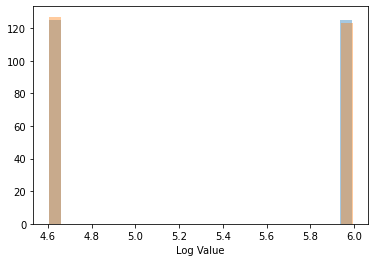

In [30]:
#Time Series - Log
sns.distplot(nlog_data['Log Value'],bins=25,kde = False)
z,_ = best_gmm1.sample(250)
sns.distplot(z,bins=25,kde=False)

In [31]:
#Time Series - Log
print(best_gmm1.score(np.array(nlog_data['Log Value']).reshape(-1,1)))
#print(best_gmm1.score(z))

5.295669517923797


Results of GMM on fft data

In [32]:
freq_ampli.describe()

,Freq,Ampli
count,126.000000,1.260000e+02
mean,0.250000,6.349206e+00
std,0.146068,5.176258e+01
min,0.000000,0.000000e+00
25%,0.125000,0.000000e+00
50%,0.250000,0.000000e+00
75%,0.375000,2.722848e-16
max,0.500000,5.000000e+02


In [33]:
best_gmm2

GaussianMixture(covariance_type='tied', n_components=4)

In [34]:
best_gmm2.weights_

array([0.50228307, 0.00793651, 0.00793651, 0.48184392])

In [35]:
best_gmm2.means_

array([[1.32801311e-01, 3.20904246e-16],
       [5.00000000e-01, 3.00000000e+02],
       [0.00000000e+00, 5.00000000e+02],
       [3.72170094e-01, 2.15354644e-16]])

In [36]:
freq_ampli

,Freq,Ampli
0,0.000,5.000000e+02
1,0.004,0.000000e+00
2,0.008,5.378755e-15
3,0.012,3.586819e-15
4,0.016,0.000000e+00
...,...,...
121,0.484,0.000000e+00
122,0.488,2.155787e-15
123,0.492,3.229717e-15
124,0.496,0.000000e+00


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

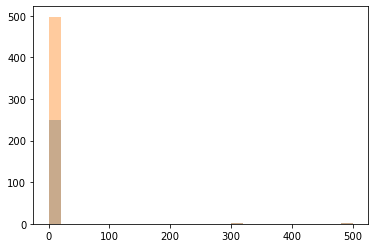

In [44]:
#Frequency
freq1 = freq_ampli
y,_ = best_gmm2.sample(250)
sns.distplot(freq1, bins = 25, kde = False)
sns.distplot(y, bins = 25, kde = False)

In [38]:
#Freq
print(best_gmm2.score(freq1))
#print(best_gmm2.score(y))

6.5130111588554955


Results of GMM on cepstrum data

In [39]:
cep.describe()

,Quefrency,Cepstrum
count,52.000000,52.000000
mean,12.500000,-18.357483
std,7.428803,428.706972
min,0.000000,-3035.862617
25%,6.250000,-0.002270
50%,12.500000,6.595214
75%,18.750000,78.135287
max,25.000000,128.468590


In [40]:
best_gmm3

GaussianMixture(covariance_type='diag', n_components=6)

In [41]:
best_gmm3.weights_

array([0.07864584, 0.12544382, 0.35295032, 0.04046314, 0.07820775,
       0.32428912])

<AxesSubplot:>

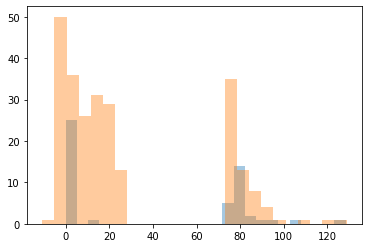

In [45]:
cep1 = cep.iloc[1:,1:]
z,_ = best_gmm3.sample(125)
sns.distplot(cep1, bins = 25, kde = False)
sns.distplot(z, bins = 25, kde = False)

In [46]:
print(best_gmm3.score(cep1))
#print(best_gmm3.score(z))

ValueError: Expected the input data X have 2 features, but got 1 features